# Axes, orientations, and distance metrics
Digital images have a natural coordinate scheme with two axes:
a vertical $y$-axis, and horizontal $x$-axis.
````{margin}
```{note}
Note that array-_indexing_, and in general pixel indexing
is vertically flipped from e.g. graphing coordinates:
row $0$ is the _top_ row of pixels, and row indices increase going down.
```
````
This is how pixels are organized in a screen,
and this is how the pixel-intensities are encoded as image matrices (e.g., `numpy.ndarray`).
But not all stimuli are most sensible _defined_ in these coordinates,
and `stimupy` has several more axes and distances it can use.

## Horizontal, vertical, oblique
As mentioned, all images have a natural vertical and horizontal axes.
Where used, `stimupy` expects them in this order: `(y, x)` or `(height, width)`
-- in line with computer science and specifically NumPy conventions.
Thus `visual_size=(12, 16)` indicates and image
that is $12$ degrees high, and $16$ degrees wide.
Positions, too, are generally specified in these coordinates:
`rectangle_position=(2, 1)` places the rectangle
$3$ degrees from the top and $5$ degree to the right:

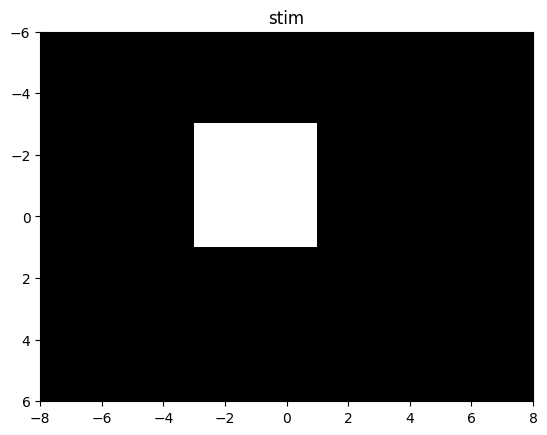

<Axes: title={'center': 'stim'}>

In [1]:
from stimupy.components import shapes
from stimupy.utils import plot_stim

stim = shapes.rectangle(visual_size=(12, 16), ppd=10,
                        rectangle_size=(4, 4),
                        rectangle_position=(3, 5))

plot_stim(stim)

While the image-axes are vertical & horizontal,
`stimupy` allows you to easily draw oblique or rotated stimuli.
Almost all stimulus-functions have a `rotation` argument,
which expresses the rotation in degrees, from counterclockwise from the 3 o'clock position
(in line with angles around a unit circle).
Note that the _stimulus_ `size` is determined along the _rotated_ $y, x$ axes,
but the _image_ size and stimulus `position` are in the original frame of reference.

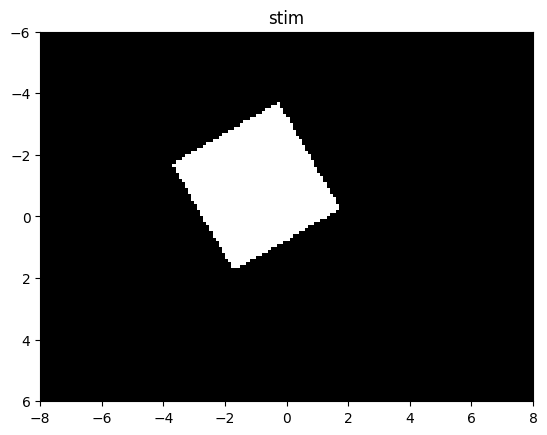

<Axes: title={'center': 'stim'}>

In [2]:
stim = shapes.rectangle(visual_size=(12, 16), ppd=10,
                        rectangle_size=(4, 4),
                        rectangle_position=(3, 5),
                        rotation=30)

plot_stim(stim)

<!-- ## Origin
```{code-cell}
stim = shapes.rectangle(visual_size=(12, 16), ppd=10,
                        rectangle_size=(4, 4),
                        rectangle_position=(3, 5),
                        rotation=30,
                        origin="mean")

plot_stim(stim)
```
-->

## Radial
Some stimuli are more naturally defined not along a linear axis like the horizontal,
vertical, and rotated/oblique axes.
One example of this is a circle,
which is more naturally defined using a given _radius_,
radiating outwards from a point of origin.

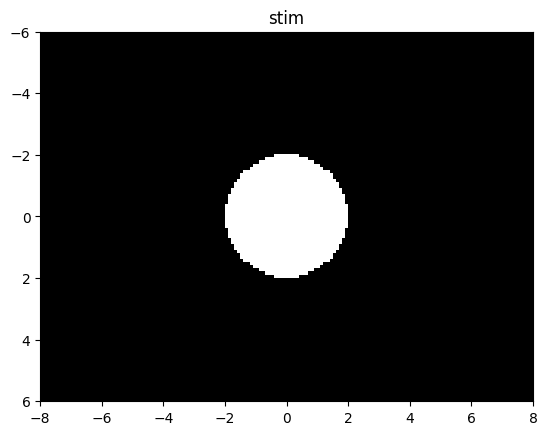

<Axes: title={'center': 'stim'}>

In [3]:
stim = shapes.circle(visual_size=(12, 16), ppd=10,
                     radius=2)

plot_stim(stim)

Here the point of origin is by default the center of the image,
but this can be changed
The `origin` parameter can be an actual `center` pixel,
the hypothetical image `mean` (if there is no single pixel at this exact location),
or the topleft `corner` of the image.

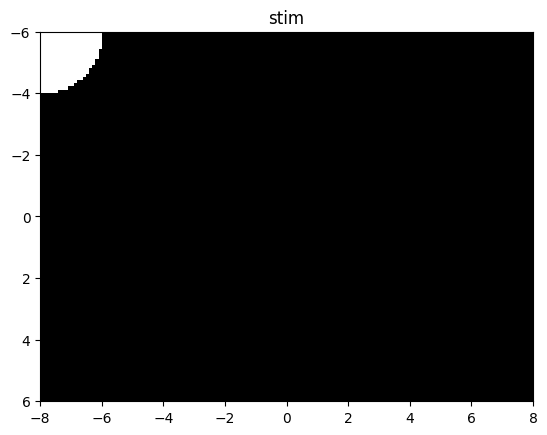

<Axes: title={'center': 'stim'}>

In [4]:
stim = shapes.circle(visual_size=(12, 16), ppd=10,
                     radius=2,
                     origin='corner')

plot_stim(stim)

## Distance metric
We term these aforementioned axes a _`distance_metric`_,
as they measure distance from some point of origin.
This way of thinking is especially important
for wave specifications in {py:mod}`stimupy.components.waves`
and their use in wave-like stimuli in {py:mod}`stimupy.stimuli.waves`.
For the linear metrics (`horizontal`, `vertical`, `oblique`),
those waves measure distance along that axis (from the `center` by default):

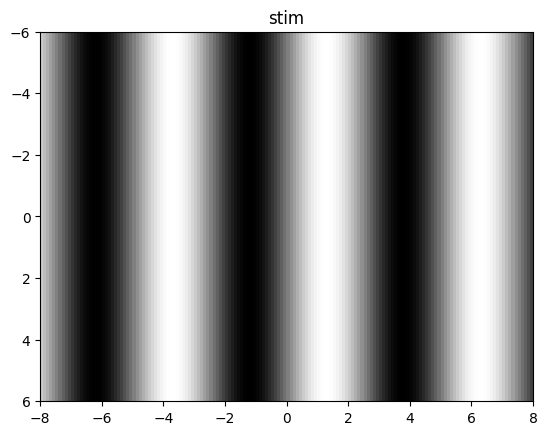

<Axes: title={'center': 'stim'}>

In [5]:
from stimupy.components import waves

stim = waves.sine(visual_size=(12, 16), ppd=10,
                  distance_metric="horizontal",
                  frequency=.2)

plot_stim(stim)

But this can be changed to another `origin` as well:

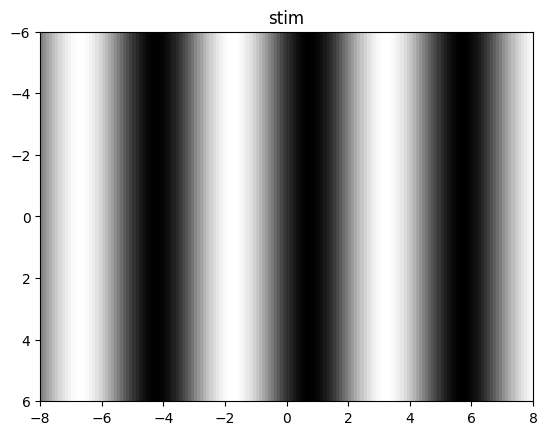

<Axes: title={'center': 'stim'}>

In [6]:
stim = waves.sine(visual_size=(12, 16), ppd=10,
                  distance_metric="horizontal",
                  frequency=.2,
                  origin='corner')

plot_stim(stim)

The `radial` stimuli are a good way of understanding the `distance_metric`:
each pixel is some distance away from the origin (`center` by default),
which is the relevant metric for determining whether that pixel
is part of the targeted region:

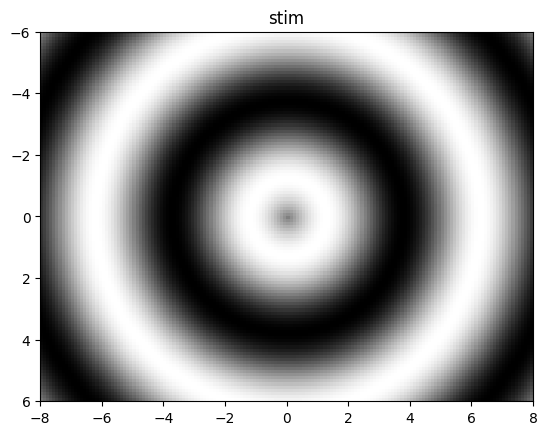

<Axes: title={'center': 'stim'}>

In [7]:
stim = waves.sine(visual_size=(12, 16), ppd=10,
                  distance_metric="radial",
                  frequency=.2)

plot_stim(stim)

```{note}
The `radial` distance is calculated as $r = \sqrt{x^2 + y^2}$.
```
## Rectilinear
A more intriguing `distance_metric` is the `rectilinear` metric,
which does not correspond to some singular linear axis in the image.
```{note}
The `rectilinear` distance is calculated as $d = \max{x^2, y^2}$
```
This creates a frame-like, or "squared-off" radial, distance:
the `rectilinear` distance of a pixel to the origin
is determined by the largest of the two linear distances.

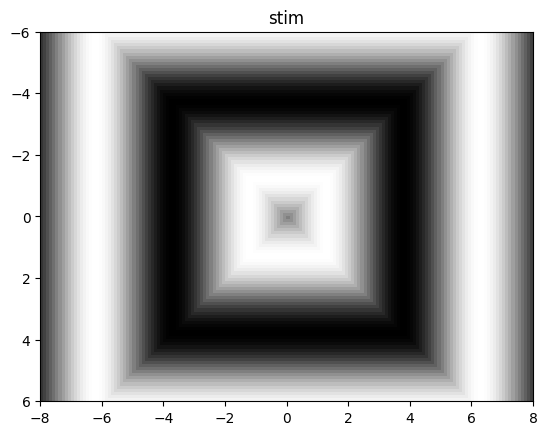

<Axes: title={'center': 'stim'}>

In [8]:
stim = waves.sine(visual_size=(12, 16), ppd=10,
                  distance_metric="rectilinear",
                  frequency=.2)

plot_stim(stim)

It is related to metrics that are often called "Manhattan", "taxicab", "cityblock".

## Angular
Another interesting `distance_metric` is the `angular` distance,
which uniquely has a fixed range of $[0, 360]$.
```{note}
The `angular` distance is calculated as the angle from 3 o'clock position (in degrees).
```

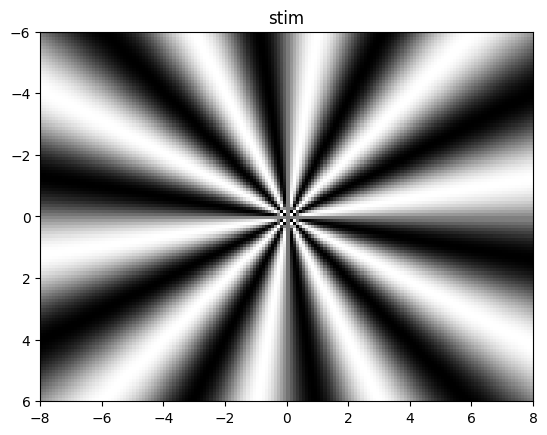

<Axes: title={'center': 'stim'}>

In [9]:
stim = waves.sine(visual_size=(12, 16), ppd=10,
                  distance_metric="angular",
                  frequency=10)

plot_stim(stim)

<!-- ## Overview
An overview of all `distance_metrics`, with pixel intensities ranging from $[0, 1]$
along each metric, looks like this:
```{code-cell}
from stimupy.components import image_base



plot_stim(stim)
```
 -->